#### AIM: To perform image classification

### LOOSY COMPRESSION

- Some of image data is discarded to reduce the file zile leading to loss in quality, However this loss is not often noticable, esepcially at higher compression
- Remove details from image that are less  important for visual perction(Small color variations  & high frequency components)
#### LOOSY compression discards some data to achieve smaller file sized(reducing image qualit)

For instance, if you have a few images on your hard drive, you can compress them and save a few megabytes of data. This is not much of an impact when hard drives are measured in Terabytes. But what if you had 100,000 images on your hard drive? Some basic compression saves real time and money. From a performance perspective, it’s the same. If you have a website with a lot of images and 10,000 people visit your website a day, compression matters.

ere’s why we do it:

Reduced storage requirements: Store more images in the same space
Faster transmission: Ideal for web applications and bandwidth-constrained scenarios
Improved processing speed: Smaller images are quicker to load and process

- Spatial Redundancy
- Color Renduancdy


### SPTIAL- neighboring pixels- similar values in most naturral images
- agar neighboring piexels bhut alag hai-noisy image, 
- Pixels changed to make those transitions less “smooth” by grouping pixels into a single color, making the image smaller.



Color redundancy, on the other hand, focuses on how adjacent areas in an image often share similar colors. Think of a blue sky or a green field—large portions of the image might have very similar color values. They can also be grouped together and made into a single color to save space.

In [4]:
import cv2
import numpy as np
import os

In [14]:
PATH='images\original_image.jpeg'

In [2]:
img=cv2.imread('images\original_image.jpeg')

In [3]:
print("Original size ",img.shape)

Original size  (266, 441, 3)


In [6]:
print(os.path.getsize(PATH))

17647


In [9]:
cv2.IMWRITE_JPEG_QUALITY

1

In [10]:
encoded_param=[int(cv2.IMWRITE_JPEG_QUALITY),90]

In [11]:
encoded_param

[1, 90]

In [8]:
cv2.IMWRITE_PNG_COMPRESSION

16

In [29]:
def compress_image(image_path,quality=20):
    img=cv2.imread(image_path)
    encoded_param=[int(cv2.IMWRITE_JPEG_QUALITY),quality]
    result,encoded_img=cv2.imencode('.jpg',img,encoded_param)
    decoded_image=cv2.imdecode(encoded_img,cv2.IMREAD_COLOR)
    return decoded_image
    

In [30]:
original_image=cv2.imread('images\original_image.jpeg')
compressed_image=compress_image(PATH)


In [31]:
# original image
rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)



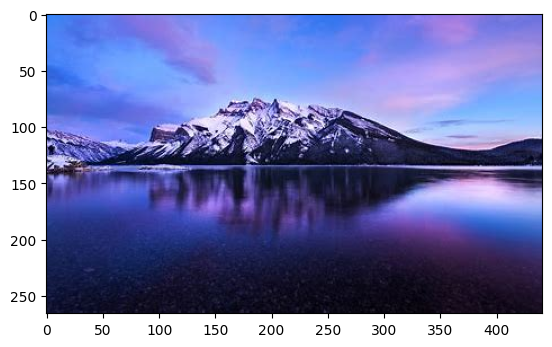

In [32]:
import matplotlib.pyplot as plt
plt.imshow(rgb)
plt.show()

In [33]:
rgbcompressed=cv2.cvtColor(compressed_image,cv2.COLOR_BGR2RGB)

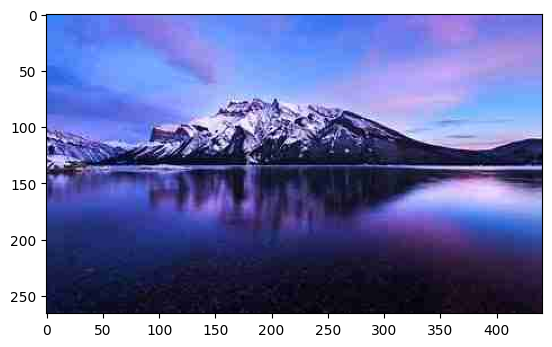

In [34]:
import matplotlib.pyplot as plt
plt.imshow(rgbcompressed)
plt.show()

In [37]:
print(os.path.getsize('edited_images/compressedby90.jpg'))

18943


In [36]:
cv2.imwrite('edited_images/compressedby90.jpg', compressed_image)


True

In [ ]:
import numpy as np
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_mnist_data():
    """Prepare MNIST dataset"""
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Reshape and normalize data
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    
    # One-hot encode target variable
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return X_train, y_train, X_test, y_test

def prepare_cifar10_data():
    """Prepare CIFAR-10 dataset"""
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # Normalize data
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255
    
    # One-hot encode target variable
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return X_train, y_train, X_test, y_test

def create_mnist_model():
    """Create CNN model for MNIST"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def create_cifar10_model():
    """Create CNN model for CIFAR-10"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluate model and print metrics"""
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    
    # Print metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Calculate ROC curve and AUC for each class
    n_classes = y_test.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

# Example usage for MNIST
def train_mnist():
    X_train, y_train, X_test, y_test = prepare_mnist_data()
    model = create_mnist_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    evaluate_model(model, X_test, y_test)
    return model, history

# Example usage for CIFAR-10
def train_cifar10():
    X_train, y_train, X_test, y_test = prepare_cifar10_data()
    model = create_cifar10_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    evaluate_model(model, X_test, y_test)
    return model, history